In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plots in Jupyter
%matplotlib inline

## ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import joblib

In [3]:

df = pd.read_csv("Heart_Disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#### Define the mappings

# Mappings based on UCI Heart Disease dataset documentation
sex_map = {0: 'Female', 1: 'Male'}
cp_map = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}
fbs_map = {0: '≤ 120 mg/dl', 1: '> 120 mg/dl'}
restecg_map = {
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
}
exang_map = {0: 'No', 1: 'Yes'}
slope_map = {
    0: 'Upsloping',
    1: 'Flat',
    2: 'Downsloping'
}
thal_map = {
    1: 'Normal',
    2: 'Fixed Defect',
    3: 'Reversible Defect'
}
target_map = {0: 'No Disease', 1: 'Disease'}


In [5]:
#### Apply the mappings

df['sex'] = df['sex'].map(sex_map)
df['cp'] = df['cp'].map(cp_map)
df['fbs'] = df['fbs'].map(fbs_map)
df['restecg'] = df['restecg'].map(restecg_map)
df['exang'] = df['exang'].map(exang_map)
df['slope'] = df['slope'].map(slope_map)
df['thal'] = df['thal'].map(thal_map)
df['target'] = df['target'].map(target_map)


In [6]:
#### Visualization
# larger plot sizes
plt.rcParams['figure.figsize'] = (10, 6)


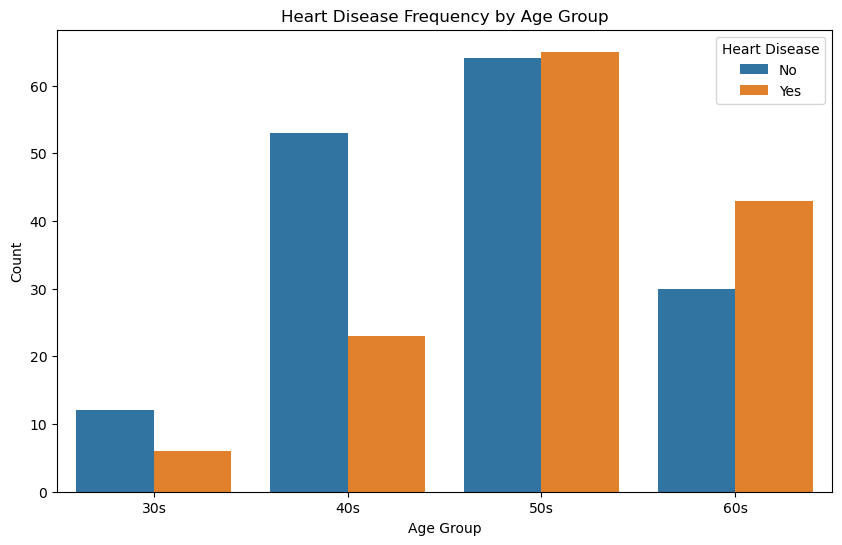

In [7]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[30, 40, 50, 60, 70], labels=['30s', '40s', '50s', '60s'])

# Count plot
sns.countplot(x='age_group', hue='target', data=df)
plt.title('Heart Disease Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


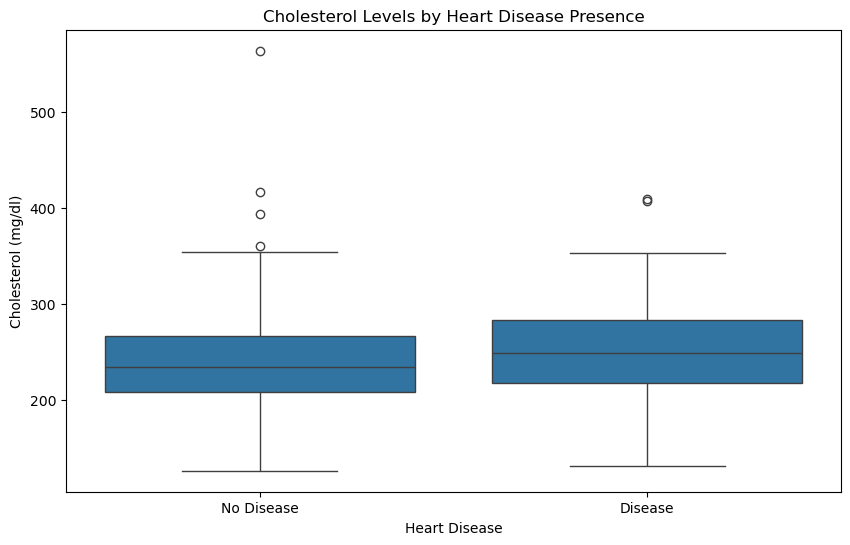

In [8]:
#### Cholesterol vs. Heart Disease

sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()


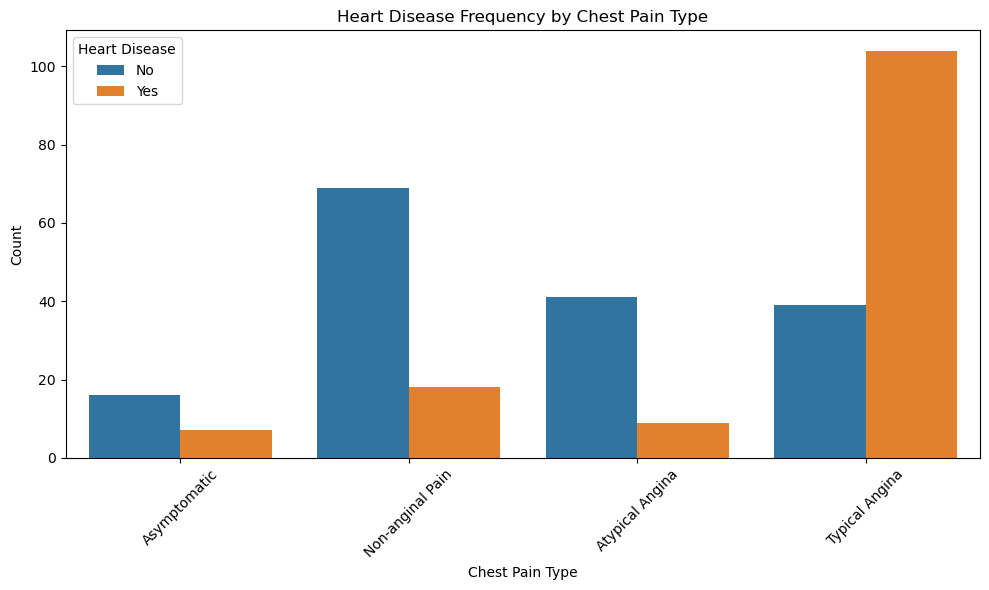

In [9]:
#### Heart Disease by Chest Pain Type
sns.countplot(x='cp', hue='target', data=df)
plt.title('Heart Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


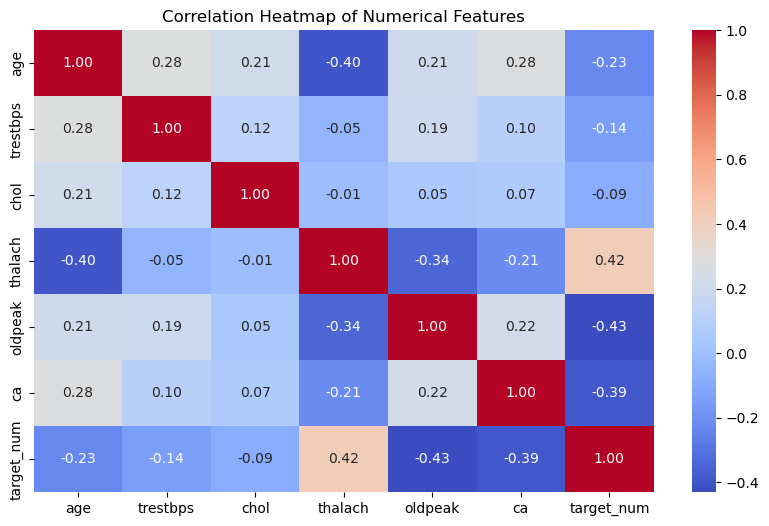

In [10]:
#### Correlation Heatmap

# Convert target back to 0/1 if you used strings earlier
df['target_num'] = df['target'].map({'No Disease': 0, 'Disease': 1})

# Correlation matrix (numerical columns only)
corr = df.select_dtypes(include='number').corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [12]:
#### Logistic Regression Model to Predict Heart Disease



# Use numeric version of target
df['target_num'] = df['target'].map({'No Disease': 0, 'Disease': 1})

# Drop non-numeric and label columns
X = df.select_dtypes(include='number').drop(['target_num'], axis=1)
y = df['target_num']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Save model
joblib.dump(log_model, 'logistic_model.pkl')

# Evaluate
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7912087912087912
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib

# Load and prepare data
df = pd.read_csv("Heart_Disease.csv")
X = df.drop("target", axis=1)
y = df["target"]

# Save column names
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, "logistic_model.pkl")


['logistic_model.pkl']

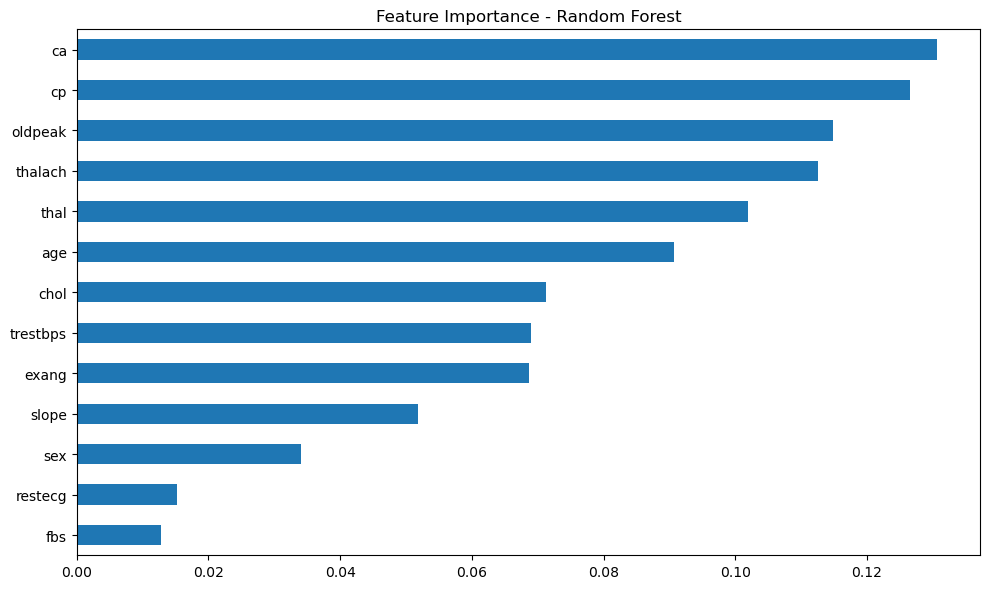

In [14]:
#### Feature Importance with RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


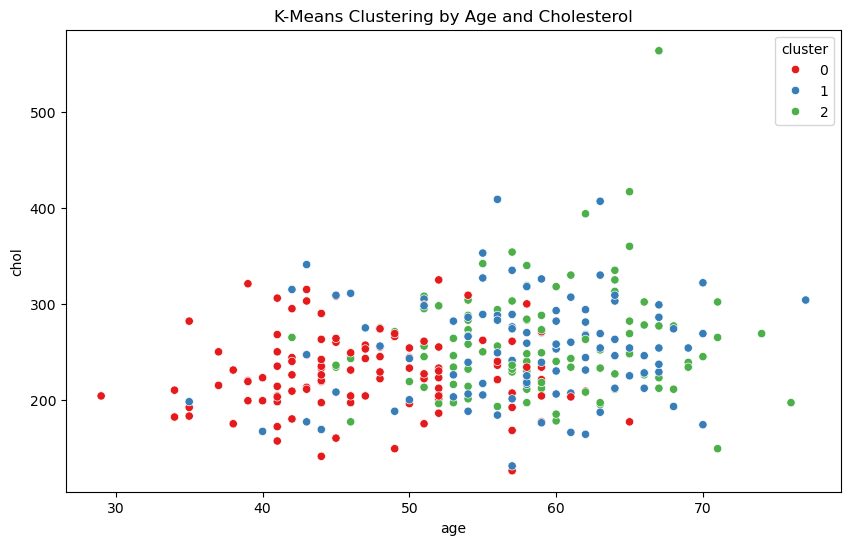

In [15]:
#### K-Means Clustering of Patients


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters by two important features
sns.scatterplot(x=df['age'], y=df['chol'], hue=df['cluster'], palette='Set1')
plt.title("K-Means Clustering by Age and Cholesterol")
plt.show()


#### Streamlit Code

In [16]:
import streamlit as st
import numpy as np
import joblib

# Load model and features
model = joblib.load("logistic_model.pkl")
features = joblib.load("feature_columns.pkl")

st.title("❤️ Heart Disease Prediction App")

st.write("Enter patient details below to predict the risk of heart disease:")

# Input fields
cp = st.slider("Chest Pain Type (0–3)", 0, 3, 1)
thalach = st.slider("Max Heart Rate Achieved (0–205)", 0, 205, 150)
oldpeak = st.slider("ST Depression (0–7)", 0.0, 7.0, 1.0, step=0.1)
ca = st.slider("Number of Major Vessels Colored by Fluoroscopy (0–3)", 0, 3, 0)
thal = st.selectbox("Thalassemia", [1, 2, 3], format_func=lambda x: {
    1: "Normal",
    2: "Fixed Defect",
    3: "Reversible Defect"
}[x])
age = st.slider("Age (25–80)", 25, 80, 50)

# Predict button
if st.button("Predict"):
    input_data = np.array([[cp, thalach, oldpeak, ca, thal, age]])
    prediction = model.predict(input_data)[0]
    label = "🩺 Heart Disease Detected" if prediction == 1 else "✅ No Heart Disease"
    st.success(label)


2025-06-29 16:39:30.069 
  command:

    streamlit run c:\Users\DELL\anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-29 16:39:30.069 Session state does not function when running a script without `streamlit run`
